# Aula 10 (19/11/2019)

## Erros e exceções

Mesmo quando um comando está sintaticamente correto, é possível que ocorram erros em sua execução. Esses erros que ocorrem em tempo de execução são chamados de exceções e, se não tratados, resultam no final fatal do programa. Alguns exemplos de exceções comuns

Mesmo quando a sintaxe de um comando em Python está correta, é possível que erros aconteçam. Esses erros em tempo de execução são chamados de exceções e podem finalizar o programa. Exemplos de exceções comuns:

**1. Divisão por zero:**

In [1]:
1/0

ZeroDivisionError: division by zero

**2. Erro de nome:** (usar o nome de uma variável não declarada antes)

In [2]:
media + 1

NameError: name 'media' is not defined

Em vez de:

In [6]:
media = 6

media + 1

7

Mesmo quando um comando está sintaticamente correto, é possível que ocorram erros em sua execução. Esses erros que ocorrem em tempo de execução são chamados de exceções e, se não tratados, resultam no final fatal do programa. Alguns exemplos de exceções comuns

**3. Erro de tipo.** Por exemplo, realisar uma operação incomparível com um tipo:

In [4]:
# O código abaixo tenta concatenar uma string e um inteiro:

'mean: ' + 1

TypeError: can only concatenate str (not "int") to str

Em vez de:

In [5]:
'mean: ' + '1'

'mean: 1'

In [4]:
while True:
    try:
        s = input('Digite um número: ')
        if s == 'stop':
            raise KeyboardInterrupt
        x = float(s)
    except ValueError:
        print('Número inválido. Tente novamente...')

Digite um número: 1
Digite um número: 2
Digite um número: 3
Digite um número: outro número
Número inválido. Tente novamente...
Digite um número: stop


KeyboardInterrupt: 

Para controlar as exceções, usamos o comando **try**. Ele funciona da seguinte maneira:

1. Os comandos definidos no bloco de código entre o **try** e o **except** são executados;
2. Se nenhuma exceção ocorrer o bloco do **except** é ignorado, terminando a execução do **try**;
3. Se uma exceção ocorrer, os comandos restantes do bloco try são ignorados;
    - Se o tipo da exceção corresponder a algum tipo de exceção nomeado após o comando except, o bloco except é executado e a execução do script continua;
    - Se a execução não corresponder aos tipos de exceção nomeados após o comando except, a exceção é lançada para escopos superiores, na tentativa de encontrar algum bloco que a trate;
    - Se a exceção permanecer não tratada, a execução irá parar.
    
O funcionamento de blocos **try** e **except** pode ser comparado a **if** e **else**, onde cada **except**, ou "else", serve para detectar e lidar com exceções. Um mesmo **try** pode estar associado a mais de um **except**, onde cada uma trata tipo de exceção. No nosso exemplo anterior, temos um **except** para a exceção *ValueError*, que ocorria quando um valor não podia ser convertido a *float*, mas não temos um para a *KeyboardInterrupt*, que ocorria quando o kernel era interrompido.

**OBS:** exceções podem ser lançadas intencionalmente através do comando **raise**.

In [3]:
while True:
    try:
        s = input('Digite um número: ')
        if s == 'stop':
            raise KeyboardInterrupt
        x = float(s)
    except ValueError:
        print('Número inválido. Tente novamente...')
    except KeyboardInterrupt:
        break

Digite um número: 1
Digite um número: 2
Digite um número: 3
Digite um número: um número
Número inválido. Tente novamente...
Digite um número: stop


Além disso, Python também permite usar um mesmo **except** para múltiplas exceções, tratando todas elas da mesma maneira. Alterando nosso exemplo anterior:

In [5]:
while True:
    try:
        s = input('Digite um número: ')
        if s == 'stop':
            raise KeyboardInterrupt
        x = float(s)
    except (ValueError,  KeyboardInterrupt):
        print('Entrada não pôde ser convertida a número.')
        break

Digite um número: 1
Digite um número: 2
Digite um número: 3
Digite um número: stop
Entrada não pôde ser convertida a número.


## Exceções definidas pelo usuário

Voltando ao conceito de herança, onde subclasses herdam propriedades de uma superclasse, todas as exceções em Python são subclasses da classe *Exception*.

Por exemplo, o código abaixo continua o exemplo anterior, mas pede para o usuário digitar o número com vírgula como marcador de decimais. Caso não haja uma vírgula na string digitada, o código irá lançar o novo tipo de exceção chamado InputError (é convenção nomear exceções com a palavra Error no final). Caso haja uma vírgula, o código irá substituí-la por ponto e depois tentar converter a string resultante para float.

In [7]:
class InputError(Exception):
    def __init__(self, input_value, message):
        self.input_value = input_value
        self.message = message
        
while True:
    try:
        x = input('Digite um número (vírgula para decimais): ')
        if x == 'stop':
            raise KeyboardInterrupt
        if ',' not in x:
            raise InputError(x, 'Valor digitado não usou vírgula para decimais')
        else:
            print('Valor digitado: {}'.format(float(x.replace(',', '.'))))
    except ValueError:
        print('Número inválido. Tente novamente...')
    except KeyboardInterrupt:
        break

Digite um número (vírgula para decimais): 1,2
Valor digitado: 1.2
Digite um número (vírgula para decimais): 1,3
Valor digitado: 1.3
Digite um número (vírgula para decimais): 1.3
Número inválido. Tente novamente...
Digite um número (vírgula para decimais): stop


Veja que o código acima usa o **raise** para lançar uma exceção *InputError*, mas não possui um **except** para tratá-la. Corrigindo isso:

In [9]:
while True:
    try:
        x = input('Digite um número (vírgula para decimais): ')
        if x == 'stop':
            raise KeyboardInterrupt
        if ',' not in x:
            raise InputError(x, 'Valor digitado não usou vírgula para decimais')
        else:
            print('Valor digitado: {}'.format(float(x.replace(',', '.'))))
    except InputError as err:
        print(err.message + ': ' + err.input_value)
    except ValueError:
        print('Número inválido. Tente novamente...')
    except KeyboardInterrupt:
        break

Digite um número (vírgula para decimais): 1,2
Valor digitado: 1.2
Digite um número (vírgula para decimais): 1.2
Valor digitado não usou vírgula para decimais: 1.2
Digite um número (vírgula para decimais): stop


Obsserve que foi usado o operador **as** para atribuir a exceção capturada ao objeto *err*,"apelidando" o objeto *InputError*, permitindo o acesso a seus atributos, message e input_value.

## O operador "finally"

O operador **try** pode ser associado tanto a operadores **except** quanto ao **finally**, que serve para definir ações que serão executadas tanto se exceções ocorrerem quanto se elas não ocorrerem. Por exemplo, se uma conexão com um servidor for aberta, ela deve ser fechada após o seu uso, tendo ou não ocorrido erros.

O bloco de código associado ao comando **finally** será sempre executado, mesmo que ocorra alguma exceção. Por exemplo:

In [12]:
i = 3

try:
    if i%2:
        raise ValueError('Lançando um erro')
    else:
        print("Número par.")
except ValueError:
    print("Número ímpar.")
finally:
    print('Adeus')

Número ímpar.
Adeus


## Computação Matemática e Científica 

O Capítulo 3 irá focar no ecossistema SciPy de softwares livres para matemática e ciência, incluindo:

- NumPy: operações com arrays n-dimensionais;
- SciPy: biblioteca fundamental para programação científica;
- Pandas: armazenamento, operações e análises usando estruturas de dados como DataFrames (como me R) e Series;
- Matplotlib: visualização de dados (plotagem de gráficos).
- Além disso, iremos cobrir pacotes de computação matemática que permitem realizar processamento em unidades de processamento gráfico (GPU, do inglês Graphics Processing Unit), incluindo PyTorch e TensorFlow.

# Numpy

NumPy é um pacote fundamental para computação científica em Python, sendo usado como base para praticamente todos os outros. Suas capacidades incluem uma poderosa classe *array*, que pode representar vetores e matrizes, sofisticadas funções para manipulação de arrays, ferramentas para integração de códigos em C/C++ e Fortran, além de funções de álgebra linear e de geração de números aleatórios. Os arrays de NumPy também podem ser usados para armazenar dados de tipos genéricos, permitindo fácil integração com diferentes tipos de bases e bancos de dados. A documentação completa para todas as versões de NumPy pode ser encontrada em [numpy.org/doc](https://numpy.org/doc).

## A classe array 

A classe *array* é o principal componente de NumPy e representa uma lista homogênea multidimensional, na forma de uma tabela de elementos (normalmente números), todos do mesmo tipo, indexada por tuplas de inteiros positivos. Um dimensão de um array é chamada de eixo (axis). Abaixo, temos dois exemplos de arrays (note sua criação por meio de listas):

In [2]:
import numpy as np

a = np.array([1, 2, 1])  # Uma dimensão, 3 elementos, tipo inteiro
b = np.array([
    [1., 0., 1.], 
    [0., 1., 2.]
])  # Duas dimensões, a primeira com tamanho 2 e a segunda com tamanho 3, tipo ponto flutuante

print(len(a), a.dtype)
print(b.shape, len(b), b.dtype)
print(b)

3 int32
(2, 3) 2 float64
[[1. 0. 1.]
 [0. 1. 2.]]


A biblioteca padrão de Python também tem uma classe array.array, mas ela serve apenas pra casos unidimensionais e oferece menos funcionalidades. Os atributos mais importantes do *array* de numpy incluem:

- array.ndim: o número de eixos do *array*
- array.shape: as dimensões do *array* na forma de uma tupla indicando o tamanho de cada dimensão; matriz  $n×m$  possui shape  $(n,m)$ 
- array.size: o número total de elementos no *arra*y
- array.dtype: o tipo dos elementos do *array*

**Criando arrays**

A criação de um *array* pode ser feita usando listas ou tuplas, com o tipo dos dados sendo deduzido através dos tpos dos elementos da sequência. Uma lista de listas resultará em um *array* bidimensional, uma lista de listas de listas dará um *array* tridimensional e assim por diante. É possível especificar o tipo do *array* na hora da criação:

In [3]:
b = np.array(
    [
        # Duas linhas, cada uma com três colunas
        [1., 0., 1.], 
        [0., 1., 2.]
    ],
    # Data type (tipo de dado): números complexos
    dtype=complex
)
print(b)

[[1.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 2.+0.j]]


Frequentemente é necessario criar *arrays* com um tamanho definido e valores iniciais que serão posteriormente modificados. Para isso, NumPy fornece diversas funções, incluindo a função **zeros**, que cria um *array* preenchido com zeros; ones, que cria um *array* preenchido com uns; **empty**, que cria um *array* cujo conteúdo inicial é aleatório e depende do estado da memória; e **eye**, que cria uma matriz identidade.

In [4]:
# Matriz 3x4 de zeros:
print(np.zeros((3, 4))) 
# Observe que as dimensões são informadas como uma tupla,
# pois shape() também retorna uma tupla.
print()

# Matriz 3x4 de uns:
print(np.ones((3, 4)))
print()

# Matriz 3x4 de valores quaisquer
print(np.empty((3, 4))) 
# Saída pode variar, pois os valores usados são os que já estavam
# guardados nos espaços de memória, praticamente aleatórios
print()

# Matriz identidade 3x3
print(np.eye(3, dtype = np.int32))
# Basta passar uma dimensão, pois a eye() gera uma matriz identidade, que é sempre quadrada

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[1 0 0]
 [0 1 0]
 [0 0 1]]


Para criar sequências de números, pode-se usar a função *arange* (*array range*), que é análoga à função range, mas retorna *arrays* e aceita criar intervalos de pontos flutuantes.

(Lembre que intervalos em Python são abertos à direita)

In [3]:
print(np.arange(5, 20, 5))
# 20 não será incluído

print()
print(np.arange(0, 2, 0.4))
# 2 não será incluído

[ 5 10 15]

[0.  0.4 0.8 1.2 1.6]


Devido a possíveis problemas de arredondamento, não é sempre possível saber quantos elementos serão gerados pela função arange ao receber pontos flutuantes como parâmetros. Nesses casos, é melhor usar a função linspace, que recebe como argumentos o início, o fim (inclusivo) e o número de valores desejados no intervalo

In [17]:
print(np.linspace(0, 1, 9)) 
# 9 números começando em 0 e terminando em 1

[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


A função linspace() é útil para avaliar funções em muitos pontos e plotar seus gráficos.

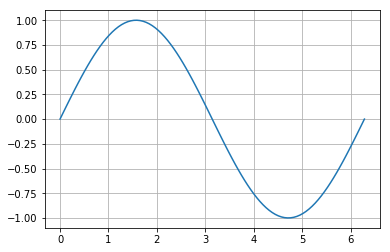

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 100)
f = np.sin(x)

plt.plot(x, f)
plt.grid()
plt.show()

**Operações básicas** 

Operações aritméticas com *arrays* sempre são aplicadas elemento-a-elemento, criando um novo *array* como resultado:

In [9]:
a = np.array([10, 20, 30, 40])
print(a)

b = np.arange(4)
print(b)
print()

# Podemos subtrair elemento a elemento:
c = a - b
print(c)
print()

# Podemos aplicar uma potência elemento a elemento:
print(b**2)
print()

# Aplicar uma operação lógica retorna um vetor de valores booleanos:
print(a < 25)
print()

# Como em R, esse vetor de booleanos pode ser passado como índice:
print(a[a < 25])
print()

# Também podemos multiplicar elemento a elemento:
print(a * b)

# Também podemos potenciar elemento a elemento:
print(a ** b)

[10 20 30 40]
[0 1 2 3]

[10 19 28 37]

[0 1 4 9]

[ True  True False False]

[10 20]

[  0  20  60 120]
[    1    20   900 64000]


Essas operações também podem ser realizadas em matrizes e arrays de mais de duas dimensões.

O operador '*' multiplica os arrays através dos elementos. Para realizar a multiplicação de matrizes, pode-se usar o operador '@', a função dot do NumPy, ou o método dot do array:

In [24]:
A = np.array(
[
        [1, 1],
        [0, 1]
    ]
)

# B é a matriz identidade multiplicada por 2
B = np.array(
    [
        [2, 0],
        [0, 2]
    ]
)

# Das três formas diferentes:
print(A @ B)
print(np.dot(A, B))
print(A.dot(B))

[[2 2]
 [0 2]]
[[2 2]
 [0 2]]
[[2 2]
 [0 2]]


In [34]:
# Multiplicação de matrizes

# A: 3 x 3
A = np.array([[1,2,3],[4,5,6],[7,8,9]])

# B: 3 x 2
B = np.array([[1,0], [2,3], [3,2]])

A @ B

array([[14, 12],
       [32, 27],
       [50, 42]])